# 05-2. Q network

In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('FrozenLake-v1')

In [9]:
tf.reset_default_graph()

inputs1 = tf.placeholder(shape = [1, 16], dtype = tf.float32)
W = tf.Variable(tf.random_uniform([16, 4], 0, 0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

nextQ = tf.placeholder(shape = [1, 4], dtype = tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
updateModel = trainer.minimize(loss)

In [11]:
init = tf.global_variables_initializer()

y = .99
e = 0.1
num_episodes = 2000

jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        while j < 99:
            j += 1
            
            a, allQ = sess.run([predict, Qout], feed_dict = {inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
                
            s1, r, d, _ = env.step(a[0])
            
            Q1 = sess.run(Qout, feed_dict = {inputs1:np.identity(16)[s1:s1+1]})
            
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y * maxQ1
            
            _, W1 = sess.run([updateModel, W], feed_dict = {inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
        
print("percent of succesful episodes: " + str(sum(rList) / num_episodes))

percent of succesful episodes: 0.4785


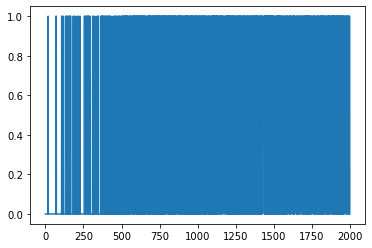

In [12]:
plt.plot(rList)

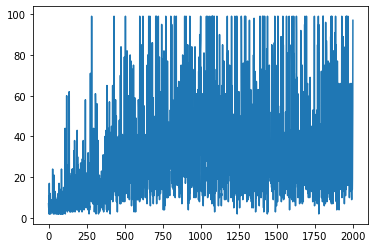

In [13]:
plt.plot(jList)